In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('../data/raw.csv')

In [3]:
df

,listing_id,title,price,bhk,area_sqft,age_years,parking,location,price_per_sqft,price_text,area_text,page_scraped
0,345954,JBMR Tathastu,95.0,3.0,NaN,NaN,NaN,NaN,NaN,₹95,.ft,1
1,272383,Risland Sky Mansion,57500000.0,3.0,NaN,NaN,NaN,NaN,NaN,₹5.75 Cr,.ft,1
2,350084,Maa Vaishno Homes,40.0,3.0,NaN,NaN,NaN,NaN,NaN,₹40,.ft,1
3,346895,Radhaya Urbanity,13800000.0,4.0,NaN,NaN,NaN,NaN,NaN,₹1.38 Cr,.ft,1
4,345951,S Gambhir Skyline Apartment,11000000.0,4.0,NaN,NaN,NaN,NaN,NaN,1.1 Cr,.ft,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,18229005,2 BHK Independent Builder Floor in Rajpur,50.0,2.0,630.0,1.0,1.0,NaN,0.079365,₹50.0,630 sq.ft,409
11996,18038066,3 BHK Independent Builder Floor in Lajpat Nagar,60000000.0,3.0,1800.0,1.0,1.0,NaN,33333.333333,₹6.0 Cr,1800 sq.ft,409
11997,18047350,3 BHK Independent Builder Floor in Mehrauli,45.0,3.0,1200.0,1.0,1.0,Delhi,0.037500,₹45.0,1200 sq.ft,409
11998,11830838,2 BHK Independent Builder Floor in Khanpur,32.5,2.0,650.0,1.0,NaN,NaN,0.050000,₹32.5,650 sq.ft,409


In [4]:
# First, let's examine the basic structure and info about our dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names and Types:")
print(df.dtypes)
print("\nBasic Info:")
df.info()

Dataset Shape: (12000, 12)

Column Names and Types:
listing_id          int64
title              object
price             float64
bhk               float64
area_sqft         float64
age_years         float64
parking           float64
location           object
price_per_sqft    float64
price_text         object
area_text          object
page_scraped        int64
dtype: object

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      12000 non-null  int64  
 1   title           11997 non-null  object 
 2   price           12000 non-null  float64
 3   bhk             11871 non-null  float64
 4   area_sqft       11751 non-null  float64
 5   age_years       11018 non-null  float64
 6   parking         8299 non-null   float64
 7   location        4213 non-null   object 
 8   price_per_sqft  11751 non-null  float64
 9   

In [5]:
df.head() 

,listing_id,title,price,bhk,area_sqft,age_years,parking,location,price_per_sqft,price_text,area_text,page_scraped
0,345954,JBMR Tathastu,95.0,3.0,NaN,NaN,NaN,NaN,NaN,₹95,.ft,1
1,272383,Risland Sky Mansion,57500000.0,3.0,NaN,NaN,NaN,NaN,NaN,₹5.75 Cr,.ft,1
2,350084,Maa Vaishno Homes,40.0,3.0,NaN,NaN,NaN,NaN,NaN,₹40,.ft,1
3,346895,Radhaya Urbanity,13800000.0,4.0,NaN,NaN,NaN,NaN,NaN,₹1.38 Cr,.ft,1
4,345951,S Gambhir Skyline Apartment,11000000.0,4.0,NaN,NaN,NaN,NaN,NaN,1.1 Cr,.ft,1


In [6]:
df.shape

(12000, 12)

In [7]:
df.dtypes 

listing_id          int64
title              object
price             float64
bhk               float64
area_sqft         float64
age_years         float64
parking           float64
location           object
price_per_sqft    float64
price_text         object
area_text          object
page_scraped        int64
dtype: object

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      12000 non-null  int64  
 1   title           11997 non-null  object 
 2   price           12000 non-null  float64
 3   bhk             11871 non-null  float64
 4   area_sqft       11751 non-null  float64
 5   age_years       11018 non-null  float64
 6   parking         8299 non-null   float64
 7   location        4213 non-null   object 
 8   price_per_sqft  11751 non-null  float64
 9   price_text      12000 non-null  object 
 10  area_text       11976 non-null  object 
 11  page_scraped    12000 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 1.1+ MB


In [9]:
def missing_value(df):
    print("Missing Values Analysis:")
    missing_summary = df.isnull().sum() 
    missing_percentage = df.isnull().mean() * 100
    missing_df = pd.DataFrame({
        'Missing_count': missing_summary,
        'Missing_percentage': missing_percentage
    }).sort_values('Missing_percentage',ascending=False)
    print(missing_df[missing_df['Missing_count'] > 0])



In [10]:
missing_value(df)

Missing Values Analysis:
                Missing_count  Missing_percentage
location                 7787           64.891667
parking                  3701           30.841667
age_years                 982            8.183333
area_sqft                 249            2.075000
price_per_sqft            249            2.075000
bhk                       129            1.075000
area_text                  24            0.200000
title                       3            0.025000


In [11]:
df.columns

Index(['listing_id', 'title', 'price', 'bhk', 'area_sqft', 'age_years',
       'parking', 'location', 'price_per_sqft', 'price_text', 'area_text',
       'page_scraped'],
      dtype='object')

In [12]:
df['parking'].value_counts()

parking
1.0    8299
Name: count, dtype: int64

In [13]:
df.sample(5)

,listing_id,title,price,bhk,area_sqft,age_years,parking,location,price_per_sqft,price_text,area_text,page_scraped
5464,17012165,4 BHK Independent Builder Floor in South Exten...,130000000.0,4.0,3600.0,1.0,NaN,NaN,36111.111111,₹13.0 Cr,3600 sq.ft,186
10811,17098136,3 BHK Independent Builder Floor in Garhi,55000000.0,3.0,1800.0,1.0,1.0,NaN,30555.555556,₹5.5 Cr,1800 sq.ft,367
2092,18379926,2 BHK Flat in Sector 10 Dwarka,20500000.0,2.0,1300.0,1.0,1.0,Sector 10,15769.230769,₹2.05 Cr,1300 sq.ft,73
9201,18411938,2.5 BHK Independent Builder Floor in Shastri N...,10000000.0,5.0,850.0,1.0,1.0,NaN,11764.705882,₹1.0 Cr,850 sq.ft,313
9039,14595495,4 BHK Flat in Sector 3 Dwarka,30000000.0,4.0,2100.0,1.0,1.0,Sector 3,14285.714286,₹3.0 Cr,2100 sq.ft,308


#### After observing the raw data, I have to drop few columns with no significane: age_years, location, price_per_sqft (I will recalculate this), area_text, page_scraped, listing_id, title

In [14]:
raw_df = df.drop(columns=['age_years','location','price_per_sqft','area_text','price_text','page_scraped','listing_id'],axis=1)

In [15]:
missing_value(raw_df)

Missing Values Analysis:
           Missing_count  Missing_percentage
parking             3701           30.841667
area_sqft            249            2.075000
bhk                  129            1.075000
title                  3            0.025000


In [16]:
raw_df.to_csv('../data/raw_processed.csv',index=False)

In [17]:
df.drop(columns=['age_years','location','price_per_sqft','area_text','price_text','page_scraped','listing_id','title'],axis=1,inplace=True)

In [18]:
missing_value(df)

Missing Values Analysis:
           Missing_count  Missing_percentage
parking             3701           30.841667
area_sqft            249            2.075000
bhk                  129            1.075000


In [19]:
df.duplicated().sum()

np.int64(4370)

In [20]:
df.head() 

,price,bhk,area_sqft,parking
0,95.0,3.0,NaN,NaN
1,57500000.0,3.0,NaN,NaN
2,40.0,3.0,NaN,NaN
3,13800000.0,4.0,NaN,NaN
4,11000000.0,4.0,NaN,NaN


#### Handling the missing data 

In [21]:
missing_value(df)

Missing Values Analysis:
           Missing_count  Missing_percentage
parking             3701           30.841667
area_sqft            249            2.075000
bhk                  129            1.075000


In [22]:
df['parking'].value_counts()

parking
1.0    8299
Name: count, dtype: int64

In [23]:
df['parking'][df['parking'] == None]

Series([], Name: parking, dtype: float64)

In [24]:
df['parking'].fillna(0,inplace=True)

C:\Users\Aabhas\AppData\Local\Temp\ipykernel_7936\1338741568.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parking'].fillna(0,inplace=True)


In [25]:
df['parking'].value_counts()

parking
1.0    8299
0.0    3701
Name: count, dtype: int64

In [26]:
df['bhk'].mode()[0]

np.float64(3.0)

In [27]:
df['area_sqft'].median() 

np.float64(1400.0)

##### Handling missing data in bhk, by filling with mode value of the column and for area_sqft, median will be used to impute 

In [28]:
df['bhk'].fillna(df['bhk'].mode()[0], inplace=True)
df['area_sqft'].fillna(df['area_sqft'].median(), inplace=True)

C:\Users\Aabhas\AppData\Local\Temp\ipykernel_7936\826305925.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bhk'].fillna(df['bhk'].mode()[0], inplace=True)
C:\Users\Aabhas\AppData\Local\Temp\ipykernel_7936\826305925.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [29]:
missing_value(df) 

Missing Values Analysis:
Empty DataFrame
Columns: [Missing_count, Missing_percentage]
Index: []


#### All missing values have been handled 

In [30]:
df.head() 

,price,bhk,area_sqft,parking
0,95.0,3.0,1400.0,0.0
1,57500000.0,3.0,1400.0,0.0
2,40.0,3.0,1400.0,0.0
3,13800000.0,4.0,1400.0,0.0
4,11000000.0,4.0,1400.0,0.0


In [31]:
df.describe() 

,price,bhk,area_sqft,parking
count,1.200000e+04,12000.000000,12000.000000,12000.000000
mean,2.965661e+07,3.089917,1640.961417,0.691583
std,5.103759e+07,0.932597,2229.662233,0.461859
min,7.500000e+00,1.000000,32.000000,0.000000
25%,7.700000e+01,3.000000,900.000000,0.000000
50%,1.865000e+07,3.000000,1400.000000,1.000000
75%,3.470000e+07,4.000000,1900.000000,1.000000
max,1.500000e+09,12.000000,109000.000000,1.000000


In [32]:
df['price'].value_counts().sort_values(ascending=True)

price
1.576000e+08      1
8.429000e+01      1
5.210000e+01      1
1.225000e+08      1
2.540000e+07      1
               ... 
3.250000e+07    161
2.750000e+07    170
2.500000e+07    178
8.500000e+01    181
7.500000e+01    201
Name: count, Length: 1011, dtype: int64

In [33]:
df

,price,bhk,area_sqft,parking
0,95.0,3.0,1400.0,0.0
1,57500000.0,3.0,1400.0,0.0
2,40.0,3.0,1400.0,0.0
3,13800000.0,4.0,1400.0,0.0
4,11000000.0,4.0,1400.0,0.0
...,...,...,...,...
11995,50.0,2.0,630.0,1.0
11996,60000000.0,3.0,1800.0,1.0
11997,45.0,3.0,1200.0,1.0
11998,32.5,2.0,650.0,0.0


In [34]:
df['price']

0              95.0
1        57500000.0
2              40.0
3        13800000.0
4        11000000.0
            ...    
11995          50.0
11996    60000000.0
11997          45.0
11998          32.5
11999          33.0
Name: price, Length: 12000, dtype: float64

#### After observing price column, there is some data inconsistency as values in lakhs are written in 2 digits while crore values are with all 0s, we need to fix this inconsistency

In [35]:
df['price'] = df['price'].apply(lambda x: x*100000 if x < 10000 else x)

In [36]:
pd.options.display.float_format = '{:,.0f}'.format

In [37]:
df.head() 

,price,bhk,area_sqft,parking
0,"9,500,000",3,"1,400",0
1,"57,500,000",3,"1,400",0
2,"4,000,000",3,"1,400",0
3,"13,800,000",4,"1,400",0
4,"11,000,000",4,"1,400",0


In [38]:
df['price'].describe()  

count          12,000
mean       31,534,747
std        50,022,919
min           750,000
25%         7,700,000
50%        18,650,000
75%        34,700,000
max     1,500,000,000
Name: price, dtype: float64

In [39]:
df.to_csv('../data/housing_cleaned.csv',index=False)

In [40]:
df.describe() 

,price,bhk,area_sqft,parking
count,"12,000","12,000","12,000","12,000"
mean,"31,534,747",3,"1,641",1
std,"50,022,919",1,"2,230",0
min,"750,000",1,32,0
25%,"7,700,000",3,900,0
50%,"18,650,000",3,"1,400",1
75%,"34,700,000",4,"1,900",1
max,"1,500,000,000",12,"109,000",1


In [41]:
df['bhk'] = df['bhk'].astype(int)
df['parking'] = df['parking'].astype(int)

In [42]:
print(df.info(), end='\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      12000 non-null  float64
 1   bhk        12000 non-null  int64  
 2   area_sqft  12000 non-null  float64
 3   parking    12000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 375.1 KB
None
              price    bhk  area_sqft  parking
count        12,000 12,000     12,000   12,000
mean     31,534,747      3      1,641        1
std      50,022,919      1      2,230        0
min         750,000      1         32        0
25%       7,700,000      3        900        0
50%      18,650,000      3      1,400        1
75%      34,700,000      4      1,900        1
max   1,500,000,000     12    109,000        1


Price Statistics:
count          12,000
mean       31,534,747
std        50,022,919
min           750,000
25%         7,700,000
50%        18,650,000
75%        34,700,000
max     1,500,000,000
Name: price, dtype: float64

Price range: ₹750,000 to ₹1,500,000,000


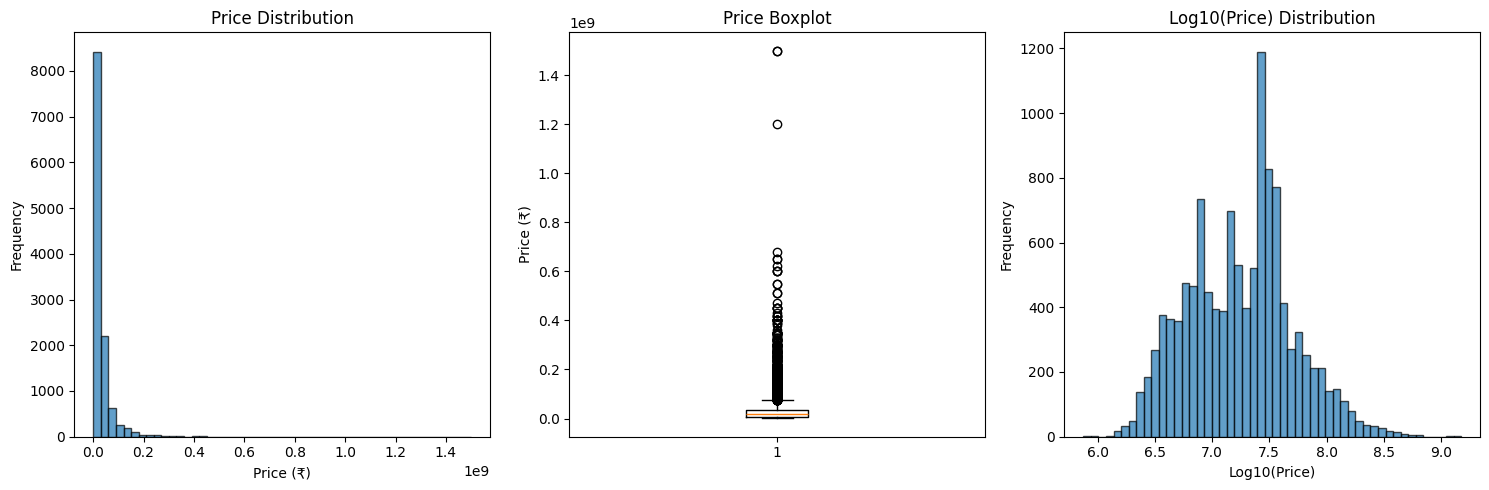

In [43]:
print("Price Statistics:")
print(df['price'].describe())
print(f"\nPrice range: ₹{df['price'].min():,.0f} to ₹{df['price'].max():,.0f}")

# Check outliers 
plt.figure(figsize=(15,5))

plt.subplot(1,3,1) 
plt.hist(df['price'],bins=50,edgecolor='black',alpha=0.7)
plt.title('Price Distribution')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
plt.boxplot(df['price'])
plt.title('Price Boxplot')
plt.ylabel('Price (₹)')

plt.subplot(1,3,3)
# Log transformation 
plt.hist(np.log10(df['price']),bins=50,edgecolor='black',alpha=0.7)
plt.title('Log10(Price) Distribution')
plt.xlabel('Log10(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show() 

<Axes: xlabel='bhk', ylabel='price'>

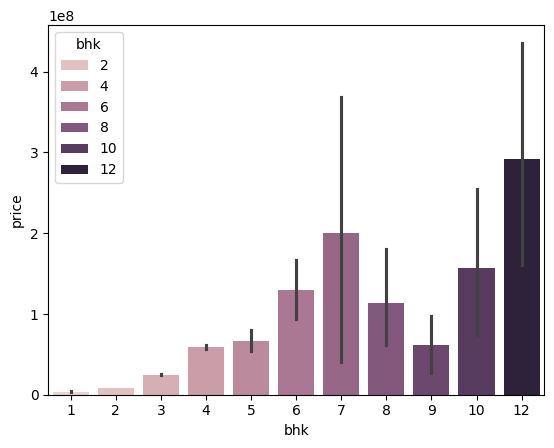

In [44]:
# Barplot: BHK vs Price 
sns.barplot(df,x='bhk',y='price',hue='bhk')

<Axes: xlabel='bhk', ylabel='price'>

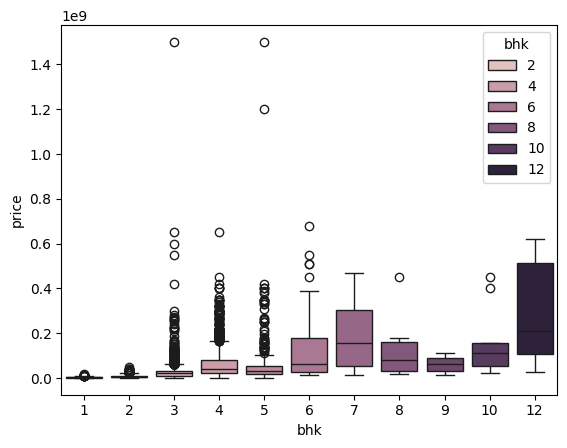

In [45]:
sns.boxplot(data=df,x='bhk',y='price',hue='bhk')

<Axes: xlabel='area_sqft', ylabel='price'>

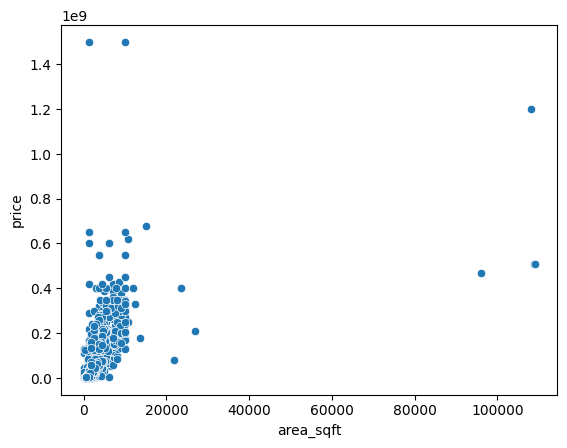

In [46]:
sns.scatterplot(data=df,x='area_sqft',y='price')

<Axes: >

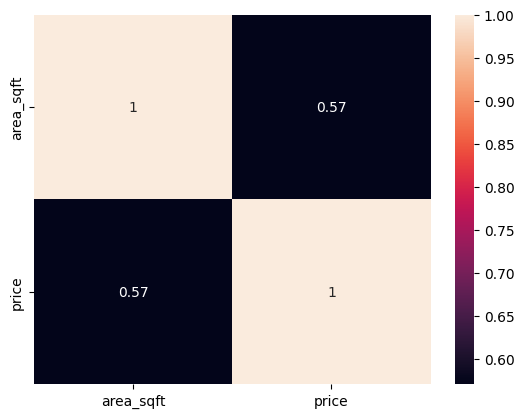

In [47]:
sns.heatmap(data=df[['area_sqft','price']].corr(),annot=True)

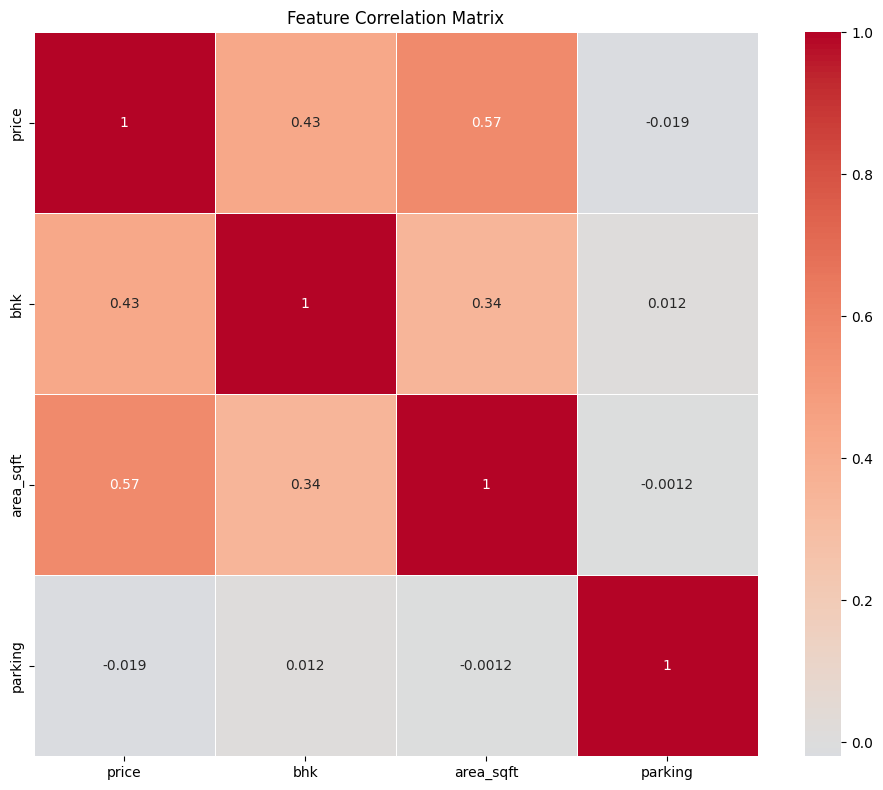

In [48]:
# Correlation Heatmap 
correlation_matrix = df.corr() 
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0,square=True,linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show() 

### FEATURE DISTRIBUTION ANALYSIS 

#### 1. BHK Distributions 


BHK Distribution:
bhk
1      366
2     2273
3     5994
4     2901
5      359
6       66
7        4
8       13
9        4
10       9
12      11
Name: count, dtype: int64
Most common BHK: 3 (50.0%)


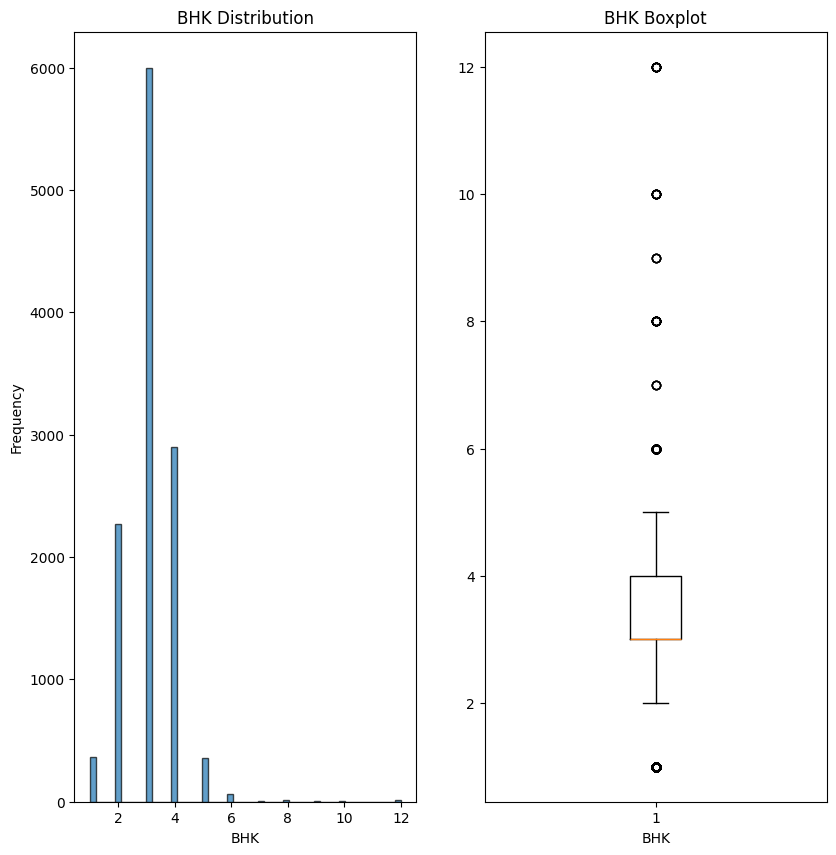

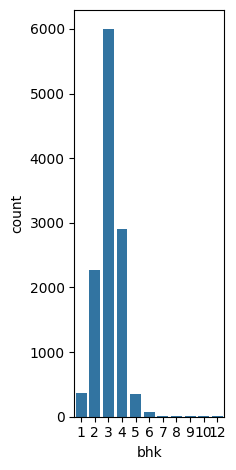

In [49]:
# BHK Analysis 
print("\nBHK Distribution:")
bhk_dist = df['bhk'].value_counts().sort_index() 
print(bhk_dist)
print(f"Most common BHK: {df['bhk'].mode()[0]} ({df['bhk'].value_counts().max()/len(df)*100:.1f}%)")

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.hist(df['bhk'],bins=50,edgecolor='black',alpha=0.7)
plt.title('BHK Distribution')
plt.xlabel('BHK')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
plt.boxplot(df['bhk'])
plt.title('BHK Boxplot')
plt.xlabel('BHK')
plt.show() 

plt.subplot(1,3,3)
sns.barplot(data=bhk_dist)
plt.tight_layout()
plt.show()

#### 2. Area Analysis 


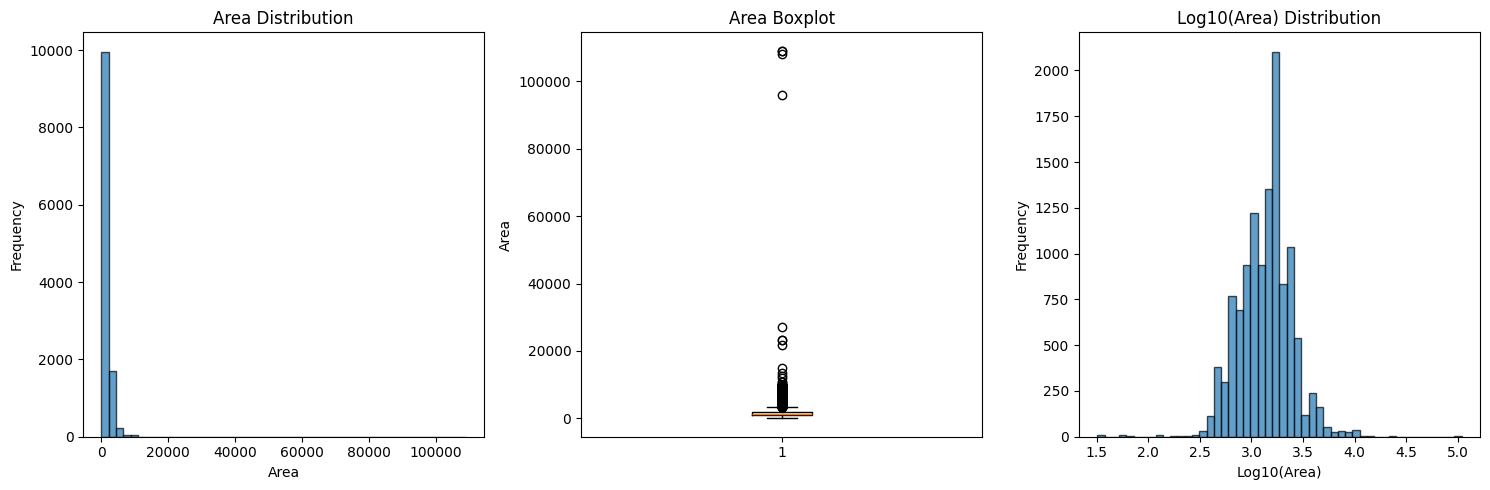



Area range: 32 to 109000 sq ft
Average area: 1641 sq ft


In [50]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1) 
plt.hist(df['area_sqft'],bins=50,edgecolor='black',alpha=0.7)
plt.title('Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
plt.boxplot(df['area_sqft'])
plt.title('Area Boxplot')
plt.ylabel('Area')

plt.subplot(1,3,3)
# Log transformation 
plt.hist(np.log10(df['area_sqft']),bins=50,edgecolor='black',alpha=0.7)
plt.title('Log10(Area) Distribution')
plt.xlabel('Log10(Area)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show() 

print(f"\n")
print(f"Area range: {df['area_sqft'].min():.0f} to {df['area_sqft'].max():.0f} sq ft")
print(f"Average area: {df['area_sqft'].mean():.0f} sq ft")

#### 3. Identifying small/large properties 

In [51]:
small = df[df['area_sqft'] < 500]
large = df[df['area_sqft'] > 3000]
print(f"Small properties (<500 sq ft): {len(small)} ({len(small)/len(df)*100:.1f}%)")
print(f"Large properties (>3000 sq ft): {len(large)} ({len(large)/len(df)*100:.1f}%)")

Small properties (<500 sq ft): 441 (3.7%)
Large properties (>3000 sq ft): 709 (5.9%)


#### 4. Parking Analysis 

In [52]:
print(f"\nParking Distribution:")
parking_dist = df['parking'].value_counts().sort_index()
print(parking_dist)
no_parking = (df['parking'] == 0).sum()
print(f"Properties without parking: {no_parking} ({no_parking/len(df)*100:.1f}%)")


Parking Distribution:
parking
0    3701
1    8299
Name: count, dtype: int64
Properties without parking: 3701 (30.8%)


In [53]:
print(f"\nArea vs BHK Analysis:")
area_per_bhk = df.groupby('bhk')['area_sqft'].agg(['mean','median','std'])
area_per_bhk


Area vs BHK Analysis:


,mean,median,std
bhk,,,
1,475,450,116
2,788,700,270
3,"1,425","1,400",654
4,"2,543","2,300","1,256"
5,"2,995","1,900","6,125"
6,"6,933","3,000","18,393"
7,"28,025","6,700","45,368"
8,"4,205","3,150","2,477"
9,"1,278","1,305",371
